<a href="https://colab.research.google.com/github/roberth2018/Quantum-Machine-Learning/blob/main/constancia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('DATAQUERY.xlsx', header=1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               8646 non-null   datetime64[ns]
 1   Coord X             8646 non-null   object        
 2   Coord Y             8646 non-null   object        
 3   Coord Z             8646 non-null   object        
 4   Unnamed: 4          8646 non-null   object        
 5   Alteración          8646 non-null   object        
 6   Litologia           8646 non-null   object        
 7   FP                  8646 non-null   object        
 8   Unnamed: 8          8646 non-null   object        
 9   BWI_Chancadora      8646 non-null   float64       
 10  SPI                 8646 non-null   float64       
 11  ID                  8646 non-null   float64       
 12  F10                 8646 non-null   object        
 13  F20                 8646 non-null   object      

In [4]:
data1 = data.rename(columns={'Unnamed: 4': 'Poligono', 'Unnamed: 8': 'Viaje.PvBh','Tonelaje': 'Tonelaje L1',
                             'Unnamed: 23': 'Work Index L1','Potencia SAG 2': 'Potencia SAG 1', 'Unnamed: 26': 'Velocidad del SAG1',
                             'Unnamed: 27': 'Tonelaje L2','Unnamed: 28':'Work Index L2','Unnamed: 29':'Potencia Bolas 2',
                             'Unnamed: 30': 'Potencia SAG 2'})

In [5]:
data1.columns

Index(['Fecha', 'Coord X', 'Coord Y', 'Coord Z', 'Poligono', 'Alteración',
       'Litologia', 'FP', 'Viaje.PvBh', 'BWI_Chancadora', 'SPI', 'ID', 'F10',
       'F20', 'F30', 'F40', 'F50', 'F60', 'F70', 'F80', 'F90', 'Fino',
       'Tonelaje L1', 'Work Index L1', 'Potencia Bolas 1', 'Potencia SAG 1',
       'Velocidad del SAG1', 'Tonelaje L2', 'Work Index L2',
       'Potencia Bolas 2', 'Potencia SAG 2', 'Velocidad del SAG2',
       'Nivel Stockpile', 'Unnamed: 33'],
      dtype='object')

In [6]:
data1=data1.drop(columns=['Fecha','Coord X', 'Coord Y', 'Coord Z','Unnamed: 33'])

In [7]:
data1.columns

Index(['Poligono', 'Alteración', 'Litologia', 'FP', 'Viaje.PvBh',
       'BWI_Chancadora', 'SPI', 'ID', 'F10', 'F20', 'F30', 'F40', 'F50', 'F60',
       'F70', 'F80', 'F90', 'Fino', 'Tonelaje L1', 'Work Index L1',
       'Potencia Bolas 1', 'Potencia SAG 1', 'Velocidad del SAG1',
       'Tonelaje L2', 'Work Index L2', 'Potencia Bolas 2', 'Potencia SAG 2',
       'Velocidad del SAG2', 'Nivel Stockpile'],
      dtype='object')

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Poligono            8646 non-null   object 
 1   Alteración          8646 non-null   object 
 2   Litologia           8646 non-null   object 
 3   FP                  8646 non-null   object 
 4   Viaje.PvBh          8646 non-null   object 
 5   BWI_Chancadora      8646 non-null   float64
 6   SPI                 8646 non-null   float64
 7   ID                  8646 non-null   float64
 8   F10                 8646 non-null   object 
 9   F20                 8646 non-null   object 
 10  F30                 8646 non-null   object 
 11  F40                 8646 non-null   object 
 12  F50                 8646 non-null   object 
 13  F60                 8646 non-null   object 
 14  F70                 8646 non-null   object 
 15  F80                 8646 non-null   object 
 16  F90   

In [9]:
data1=data1.dropna()                 
indexNames = data1[data1['FP'] =='No Data'].index
data1.drop(indexNames , inplace=True)
data1['FP'] = data1['FP'].astype(float)
indexNames1=data1[data1['F10'] =='AccessDenied'].index
indexNames2=data1[data1['F10'] =='Failed'].index
indexNames3=data1[data1['F10'] =='Not Connect'].index
data1.drop(indexNames1 ,inplace=True)
data1.drop(indexNames2 ,inplace=True)   
data1.drop(indexNames3 ,inplace=True) 
data1['F10'] = data1['F10'].astype(float)
indexNames=data1[data1['F20'] == 'AccessDenied'].index
data1.drop(indexNames , inplace=True)
data1['F20'] = data1['F20'].astype(float)
indexNames=data1[data1['F30'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['F30'] = data1['F30'].astype(float)
indexNames=data1[data1['F40'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['F40'] = data1['F40'].astype(float)
indexNames=data1[data1['F50'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['F50'] = data1['F50'].astype(float)
indexNames=data1[data1['F60'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['F60'] = data1['F60'].astype(float)
indexNames=data1[data1['F70'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['F70'] = data1['F70'].astype(float)
indexNames=data1[data1['F80'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['F80'] = data1['F80'].astype(float)
indexNames=data1[data1['F90'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['F90'] = data1['F90'].astype(float)
indexNames=data1[data1['Fino'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Fino'] = data1['Fino'].astype(float)
indexNames=data1[data1['Tonelaje L1'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Tonelaje L1'] = data1['Tonelaje L1'].astype(float)
indexNames=data1[data1['Work Index L1'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Work Index L1'] = data1['Work Index L1'].astype(float)
indexNames=data1[data1['Potencia Bolas 1'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Potencia Bolas 1'] = data1['Potencia Bolas 1'].astype(float)
indexNames=data1[data1['Potencia SAG 1'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Potencia SAG 1'] = data1['Potencia SAG 1'].astype(float)
indexNames=data1[data1['Velocidad del SAG1'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Velocidad del SAG1'] = data1['Velocidad del SAG1'].astype(float)
indexNames=data1[data1['Tonelaje L2'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Tonelaje L2'] = data1['Tonelaje L2'].astype(float)
indexNames=data1[data1['Work Index L2'] == 'Bad'].index
data1.drop(indexNames , inplace=True)
data1['Work Index L2'] = data1['Work Index L2'].astype(float)
indexNames=data1[data1['Potencia Bolas 2'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Potencia Bolas 2'] = data1['Potencia Bolas 2'].astype(float)
indexNames=data1[data1['Potencia SAG 2'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Potencia SAG 2'] = data1['Potencia SAG 2'].astype(float)
indexNames=data1[data1['Velocidad del SAG2'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Velocidad del SAG2'] = data1['Velocidad del SAG2'].astype(float)
indexNames=data1[data1['Nivel Stockpile'] == 'No Data'].index
data1.drop(indexNames , inplace=True)
data1['Nivel Stockpile'] = data1['Nivel Stockpile'].astype(float)
indexNames = data1[data1['Alteración'] =='No Data'].index
data1.drop(indexNames , inplace=True)
data1['Alteración'] = data1['Alteración'].astype(object)


data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 7204
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Poligono            5959 non-null   object 
 1   Alteración          5959 non-null   object 
 2   Litologia           5959 non-null   object 
 3   FP                  5959 non-null   float64
 4   Viaje.PvBh          5959 non-null   object 
 5   BWI_Chancadora      5959 non-null   float64
 6   SPI                 5959 non-null   float64
 7   ID                  5959 non-null   float64
 8   F10                 5959 non-null   float64
 9   F20                 5959 non-null   float64
 10  F30                 5959 non-null   float64
 11  F40                 5959 non-null   float64
 12  F50                 5959 non-null   float64
 13  F60                 5959 non-null   float64
 14  F70                 5959 non-null   float64
 15  F80                 5959 non-null   float64
 16  F90   

In [10]:
data2= data1
data2=data2.drop(columns=['ID'])
data_df = data2
#eliminando ouliers
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1

data_df_out = data_df[~((data_df < (Q1 - 1.5 * IQR)) |(data_df > (Q3 + 1.5 * IQR))).any(axis=1)]
data_df_out.shape
data_df_out.describe()



,FP,BWI_Chancadora,SPI,F10,F20,F30,F40,F50,F60,F70,F80,F90,Fino,Tonelaje L1,Work Index L1,Potencia Bolas 1,Potencia SAG 1,Velocidad del SAG1,Tonelaje L2,Work Index L2,Potencia Bolas 2,Potencia SAG 2,Velocidad del SAG2,Nivel Stockpile
count,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000
mean,0.391448,16.077061,91.875768,0.053155,0.180021,0.371960,0.661615,1.099582,1.566967,2.081395,2.675179,3.637614,48.779028,1986.332996,17.458174,15040.122738,15924.573440,9.285664,2004.637796,17.379810,14879.326992,14885.542325,9.210985,84.854469
std,0.119903,3.359728,27.178931,0.009907,0.036906,0.078353,0.186131,0.294782,0.355766,0.414715,0.467513,0.482130,6.123915,109.588186,1.183613,453.427659,558.245887,0.172587,83.059318,0.837581,657.486695,544.791659,0.007608,4.488215
min,0.014984,6.077256,29.231460,0.030295,0.101922,0.209075,0.350125,0.529602,0.827050,1.205825,1.534207,2.468695,36.260820,1629.278000,14.634420,14077.370000,14538.180000,9.100738,1727.611000,14.976070,12845.160000,13382.800000,9.185925,73.383260
25%,0.295300,15.051470,71.618240,0.046234,0.154298,0.316982,0.534546,0.887784,1.315652,1.789099,2.310977,3.302162,44.573820,1933.326250,16.585197,14714.862500,15482.015000,9.168316,1974.872250,16.881980,14358.772500,14487.425000,9.207037,82.079802
50%,0.434219,17.713020,96.255200,0.052827,0.178799,0.369466,0.625123,1.086133,1.552266,2.069570,2.677208,3.651661,48.232630,2004.312000,17.346190,14950.080000,15916.410000,9.187627,2021.274000,17.393700,14901.915000,14891.605000,9.209629,84.440880
75%,0.491414,18.360954,115.860000,0.059222,0.202972,0.421063,0.748424,1.281813,1.788289,2.346708,2.985203,3.958732,52.590852,2062.286000,18.186177,15218.532500,16398.670000,9.454401,2052.433500,17.925165,15284.362500,15296.687500,9.217407,88.500615
max,0.550000,19.320000,139.940000,0.081769,0.284827,0.593653,1.242175,1.891693,2.513662,3.126021,3.915624,4.886922,64.160430,2224.618000,21.224770,16908.250000,17306.220000,9.728971,2183.103000,20.184080,16996.920000,16416.180000,9.247037,93.416150


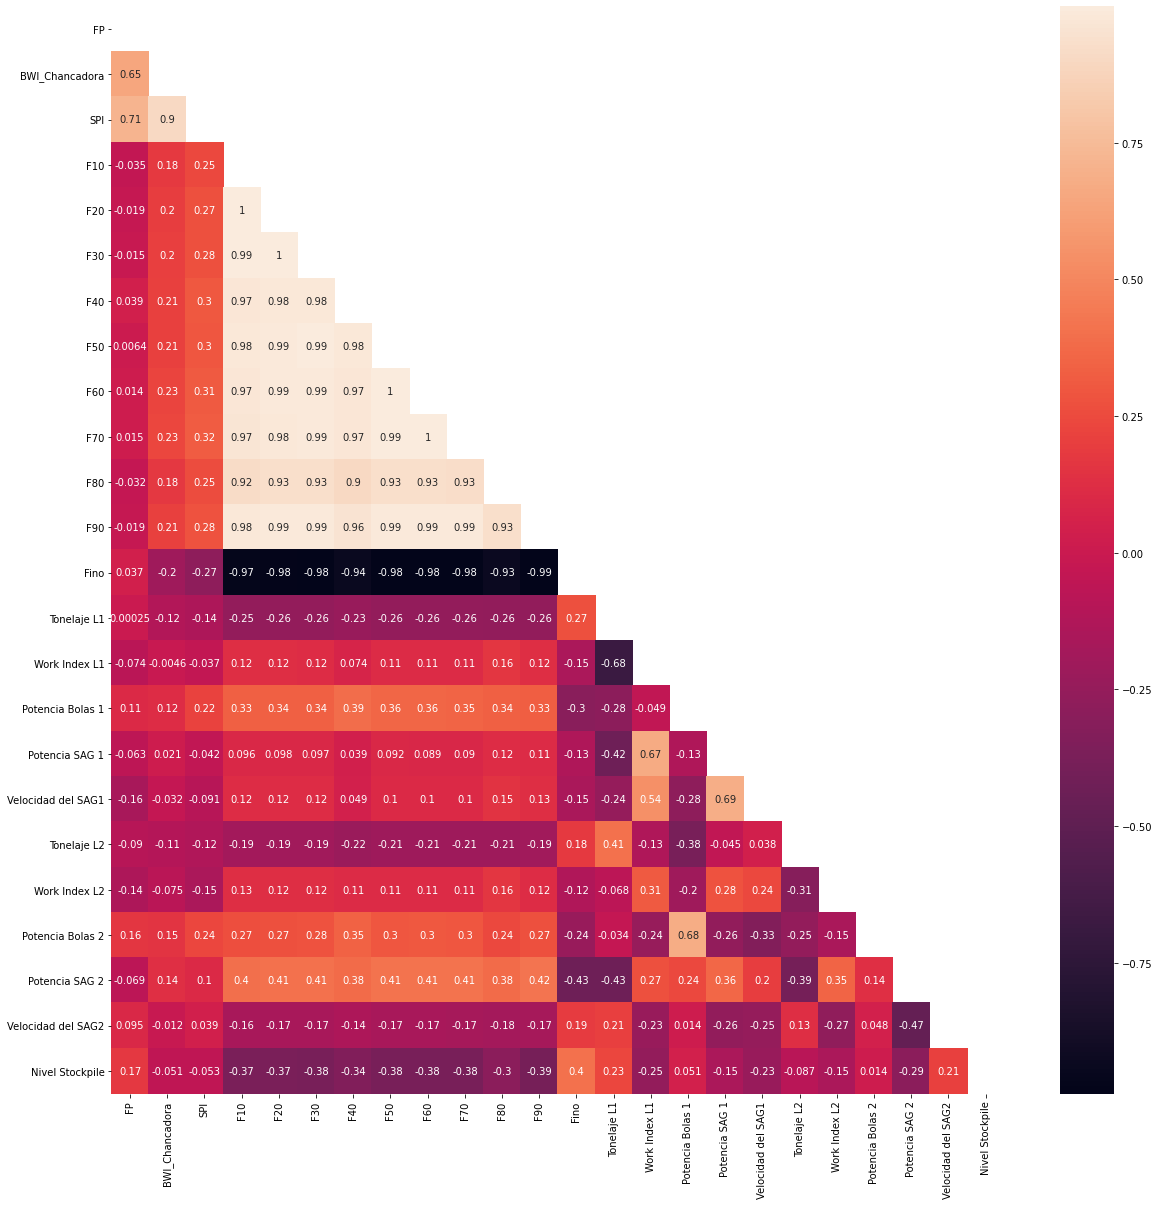

In [11]:
#matriz de correlación de Pearson
fig, ax = plt.subplots(figsize=(20, 20)) 
mask = np.zeros_like(data_df_out.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(data_df_out.corr(), mask= mask, ax= ax, annot= True)

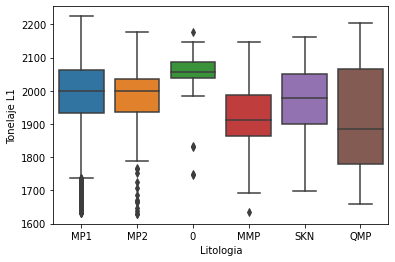

In [12]:

sns.boxplot(x="Litologia", y="Tonelaje L1", data=data_df_out)

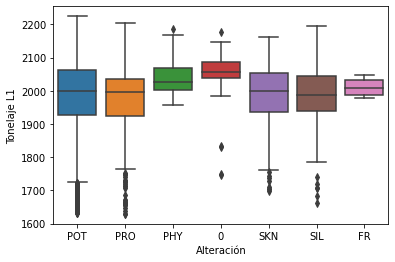

In [13]:
sns.boxplot(x="Alteración", y="Tonelaje L1", data=data_df_out)

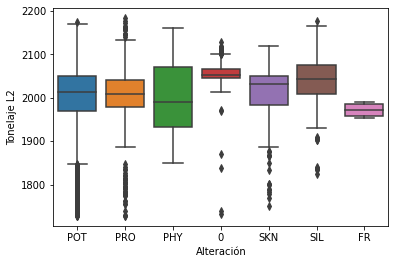

In [14]:
sns.boxplot(x="Alteración", y="Tonelaje L2", data=data_df_out)

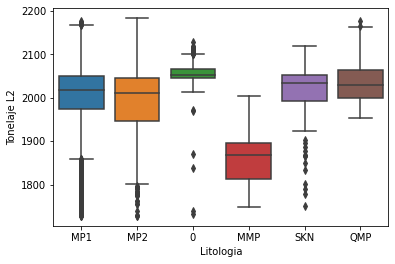

In [15]:
sns.boxplot(x="Litologia", y="Tonelaje L2", data=data_df_out)

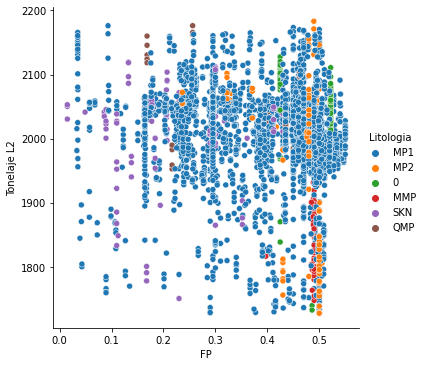

In [16]:
g = sns.relplot(data=data_df_out, x="FP", y="Tonelaje L2",
    hue="Litologia", sizes=(10, 200))

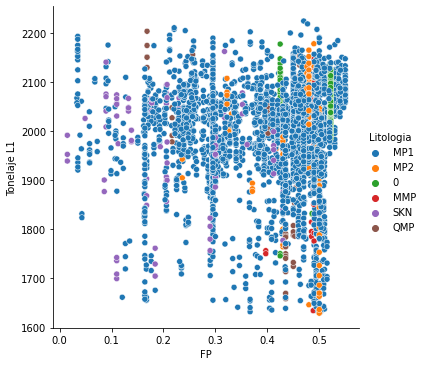

In [17]:
g = sns.relplot(data=data_df_out, x="FP", y="Tonelaje L1",
    hue="Litologia", sizes=(10, 200))


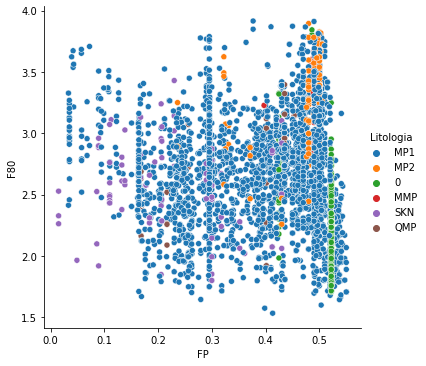

In [18]:
g = sns.relplot(data=data_df_out, x="FP", y="F80",
    hue="Litologia", sizes=(10, 200))


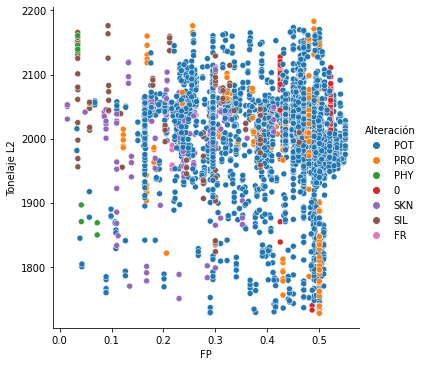

In [19]:
g = sns.relplot(data=data_df_out, x="FP", y="Tonelaje L2",
    hue="Alteración", sizes=(10, 200))


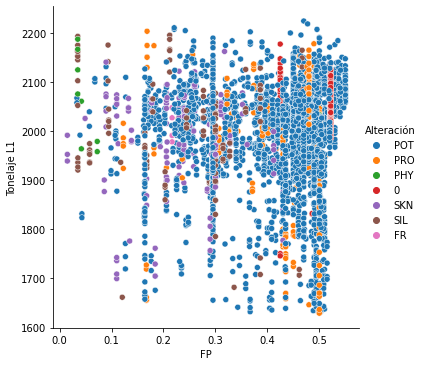

In [20]:
g = sns.relplot(data=data_df_out, x="FP", y="Tonelaje L1",
    hue="Alteración", sizes=(10, 200))


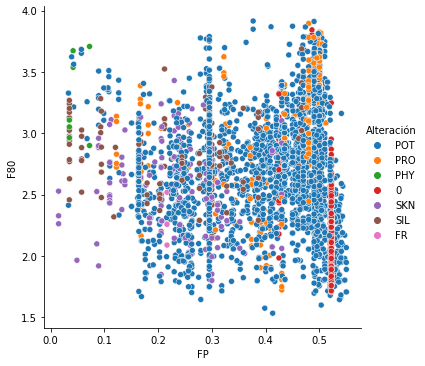

In [21]:
g = sns.relplot(data=data_df_out, x="FP", y="Tonelaje Linea 1",
    hue="Alteración", sizes=(10, 200))


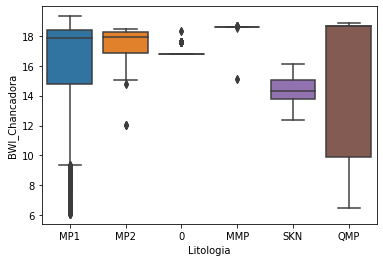

In [23]:
sns.boxplot(x="Litologia", y="BWI_Chancadora", data=data_df_out)

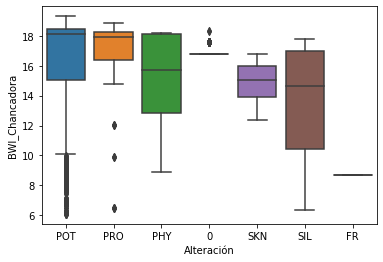

In [24]:
sns.boxplot(x="Alteración", y="BWI_Chancadora", data=data_df_out)

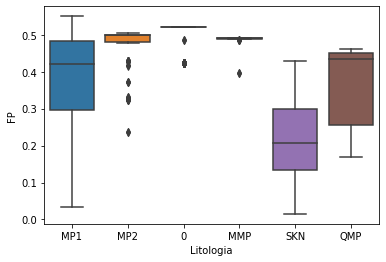

In [26]:
sns.boxplot(x="Litologia", y="FP", data=data_df_out)

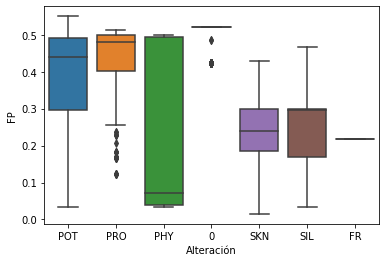

In [27]:
sns.boxplot(x="Alteración", y="FP", data=data_df_out)

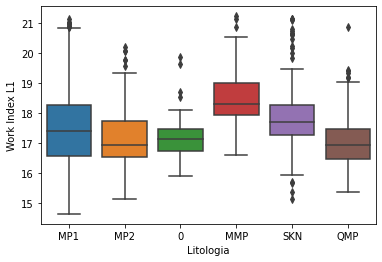

In [25]:
sns.boxplot(x="Litologia", y="Work Index L1", data=data_df_out)


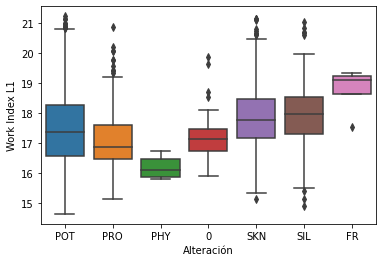

In [28]:
sns.boxplot(x="Alteración", y="Work Index L1", data=data_df_out)

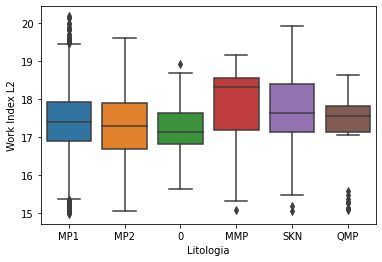

In [29]:
sns.boxplot(x="Litologia", y="Work Index L2", data=data_df_out)

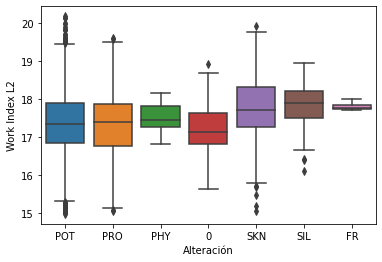

In [30]:
sns.boxplot(x="Alteración", y="Work Index L2", data=data_df_out)

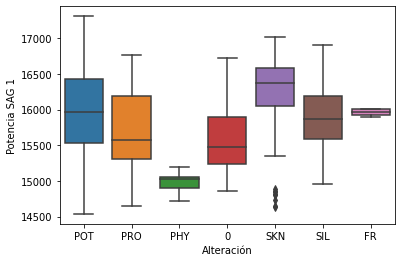

In [31]:
sns.boxplot(x="Alteración", y="Potencia SAG 1", data=data_df_out)

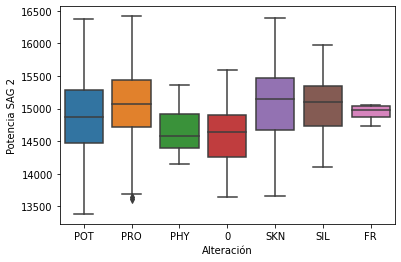

In [32]:
sns.boxplot(x="Alteración", y="Potencia SAG 2", data=data_df_out)

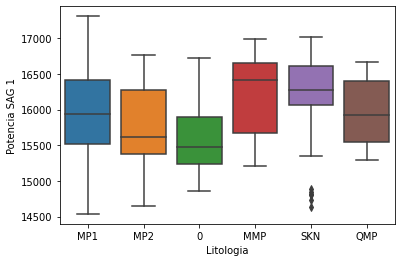

In [33]:
sns.boxplot(x="Litologia", y="Potencia SAG 1", data=data_df_out)

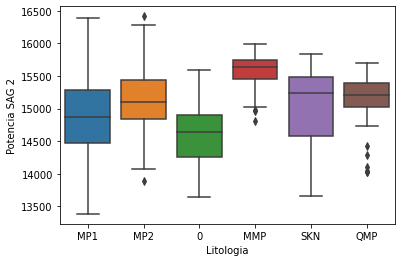

In [34]:
sns.boxplot(x="Litologia", y="Potencia SAG 2", data=data_df_out)